In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import patsy as pt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import chi2_contingency

# Part 1: Problem Context

This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, GradeClass, classifies students' grades into distinct categories, providing a robust dataset for educational research, predictive modeling, and statistical analysis.

It originated from a Kaggle dataset curated by Rabie El Kharoua, based on common attributes used in educational performance research. In this project, the dataset is used to formulate a classification problem—such as predicting whether a student scores above or below a performance threshold or categorizing students into achievement levels.

Solving this problem is important because understanding the factors that influence student achievement can help educators design targeted interventions, reduce performance gaps, and support data-driven decisions that improve student outcomes.

# Part 2: Exploratory Data Analysis

In [2]:
student_perf_df = pd.read_csv("https://img1.wsimg.com/blobby/go/95a603d1-9621-42dd-ac5a-bc61ff2699b4/downloads/dd29d21b-f1eb-4d17-8426-43233aafe601/Student_performance_data%20_.csv?ver=1762568366189")
student_perf_df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
student_perf_df.info()
student_perf_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


# Visualize some of the data features
Getting a feel for the data initially...

<Axes: title={'center': 'Grade Class'}, xlabel='GradeClass'>

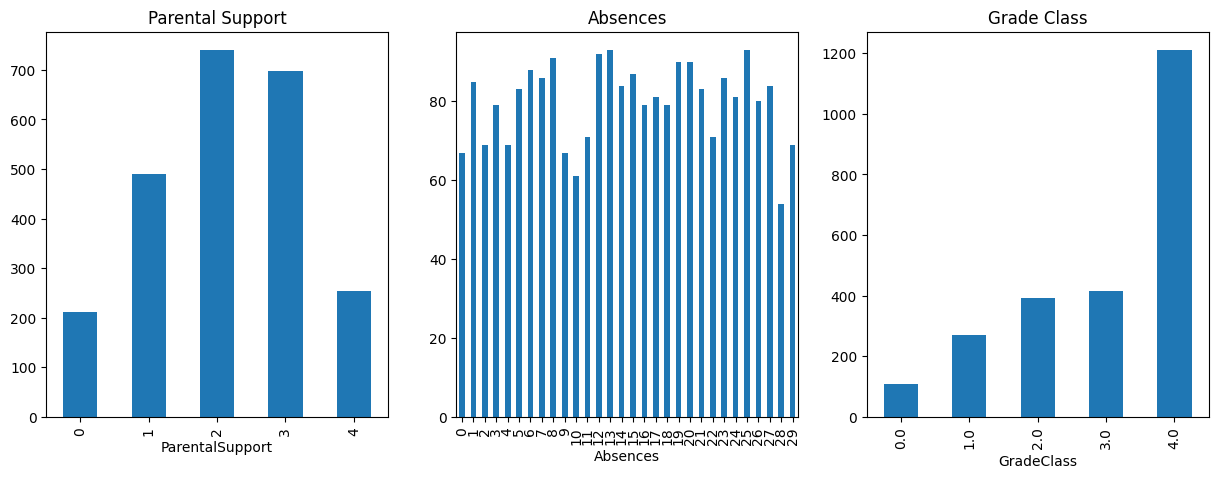

In [4]:
# Create a figure and a 1x3 grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot each bar chart on its respective axis
student_perf_df['ParentalSupport'].value_counts().sort_index().plot(kind='bar', ax=axes[0], title='Parental Support')
student_perf_df['Absences'].value_counts().sort_index().plot(kind='bar', ax=axes[1], title='Absences')
student_perf_df['GradeClass'].value_counts().sort_index().plot(kind='bar', ax=axes[2], title='Grade Class')

### Interpretation:
There is a roughly normal distribution of parental support, a left skewed for GradeClass, and very varied for number of absences.
It would be good to investigate some of these with repsect to GPA.

### Distribution of GPA

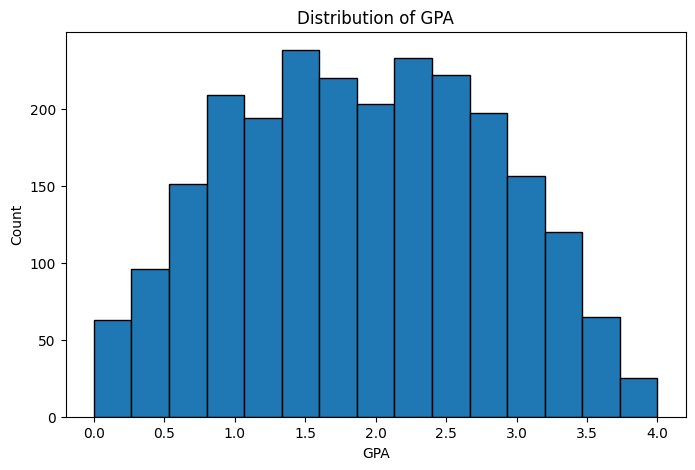

In [5]:
plt.figure(figsize=(8,5))
plt.hist(student_perf_df['GPA'], bins=15, edgecolor='black')
plt.title("Distribution of GPA")
plt.xlabel("GPA")
plt.ylabel("Count")
plt.show()

### Interpretation:
This distribution shows that student performance is more or less normally distributed.

### GPA by Study Time Weekly

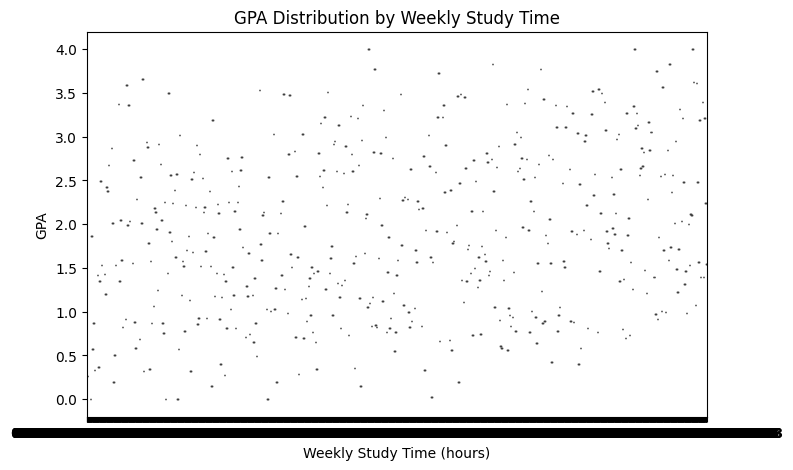

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(data=student_perf_df, x='StudyTimeWeekly', y='GPA')
plt.title("GPA Distribution by Weekly Study Time")
plt.xlabel("Weekly Study Time (hours)")
plt.ylabel("GPA")
plt.show()

### GPA by Study Time Weekly (Bucketed)

In [7]:
import pandas as pd

# Define bins and labels
bins = [0, 2, 5, 10, student_perf_df['StudyTimeWeekly'].max()]
labels = ["0–2 hrs", "3–5 hrs", "6–10 hrs", "11+ hrs"]

student_perf_df['StudyTimeBucket'] = pd.cut(student_perf_df['StudyTimeWeekly'], bins=bins, labels=labels, include_lowest=True)

student_perf_df[['StudyTimeWeekly', 'StudyTimeBucket']].head()

,StudyTimeWeekly,StudyTimeBucket
0,19.833723,11+ hrs
1,15.408756,11+ hrs
2,4.210570,3–5 hrs
3,10.028829,11+ hrs
4,4.672495,3–5 hrs


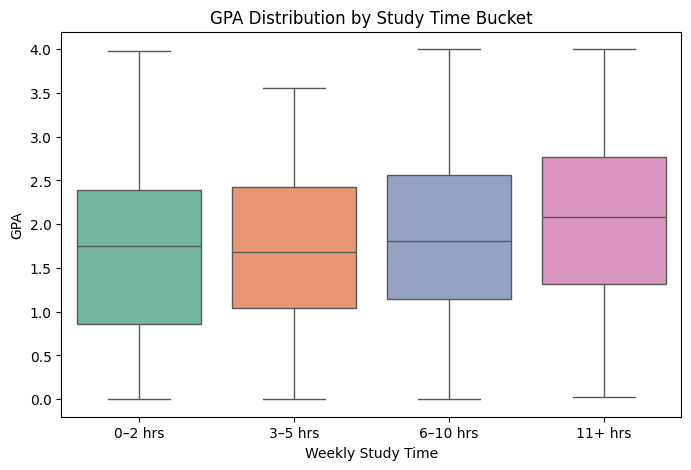

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=student_perf_df, x='StudyTimeBucket', y='GPA', palette='Set2', hue='StudyTimeBucket')
plt.title("GPA Distribution by Study Time Bucket")
plt.xlabel("Weekly Study Time")
plt.ylabel("GPA")
plt.show()

### Interpretation:

After grouping weekly study time into buckets, the boxplot reveals a general upward trend: students studying 6–10 hours or more tend to have higher median GPAs than those studying fewer than 5 hours a week. However, there is still notable overlap in the lower buckets, suggesting that while study time is correlated with performance, it is not the sole determinant of GPA.

# Heatmap of Numeric Features

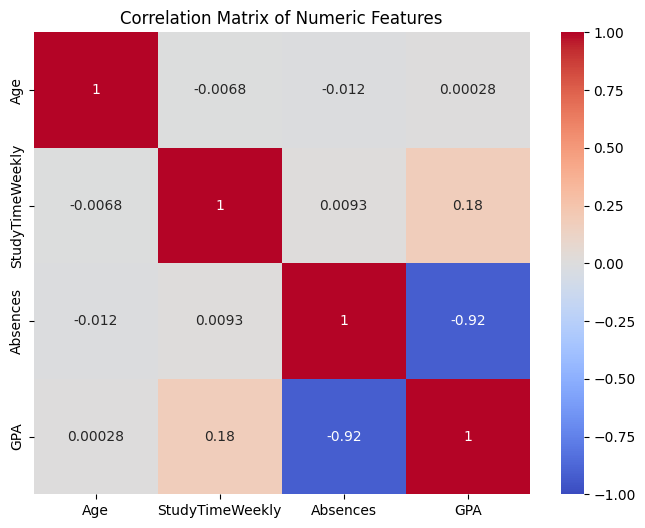

In [9]:
num_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

plt.figure(figsize=(8,6))
sns.heatmap(student_perf_df[num_cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

### Interpretation:
So absences seems to have a strong negative impact on GPA.

### GPA By Parental Support

/tmp/ipython-input-3541561683.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=student_perf_df, x='ParentalSupport', y='GPA', palette='Set3')


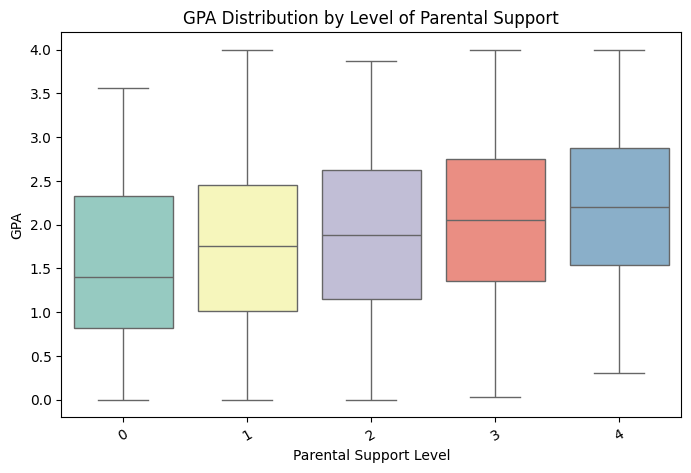

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=student_perf_df, x='ParentalSupport', y='GPA', palette='Set3')

plt.title("GPA Distribution by Level of Parental Support")
plt.xlabel("Parental Support Level")
plt.ylabel("GPA")
plt.xticks(rotation=30)   # rotates labels if they are long
plt.show()

### Interpretation:
Increased parental support seems to correlate with increased GPA.

# Part 3: Hyperparameter Selection

For this project, I am using the XGBoost classifier to predict student academic outcomes based on demographic, behavioral, and parental involvement features. Two hyperparameters I plan to tune are max_depth and learning_rate, both of which strongly influence model behavior and generalization.

1. max_depth
This hyperparameter controls how deep each decision tree in the boosted ensemble is allowed to grow. Deeper trees can model more complex interactions between features—such as the combined effect of study time, parental support, and absences—but they also increase the risk of overfitting. Tuning max_depth is important to ensure that the model is complex enough to capture meaningful patterns in student behavior while remaining generalizable to new data.

2. learning_rate
The learning rate determines how much each new tree contributes to the overall model. A lower learning rate makes learning more gradual and stable, often requiring more trees but improving generalization. A higher learning rate speeds up training but can cause the model to converge too quickly or overshoot the optimal solution. Tuning this parameter helps balance model stability with training efficiency.


** ChatGPT Disclosure: ChatGPT was used in the exploration and understanding of XGBoost, hyperparameters, and how documentation for each

In [11]:
from xgboost import XGBClassifier

# Instantiate a baseline model with the two hyperparameters I plan to tune
xgb_model = XGBClassifier(
    max_depth=4,        # placeholder value
    learning_rate=0.1,  # placeholder value
    n_estimators=100,   # common default
    random_state=42
)

xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [12]:
param_grid = {
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.05, 0.1, 0.2]
}

param_grid

{'max_depth': [3, 4, 5, 6], 'learning_rate': [0.01, 0.05, 0.1, 0.2]}

# Part 4: XGBoost Training

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Your existing dataframe
student_perf_df.head()

# Define features and target
X = student_perf_df.drop(["GradeClass", "StudentID"], axis=1)
y = student_perf_df["GradeClass"]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

In [14]:
# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [15]:
# Train initial model
model = XGBClassifier(
    max_depth=4,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
    eval_metric="mlogloss"   # avoids warnings in multiclass
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [16]:
# Eval performance
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

accuracy, f1

(0.9206680584551148, 0.9170816726846969)

### Summary:
I trained an initial XGBoost classifier using features from the student_perf_df dataset after applying one-hot encoding to all categorical variables. I used max_depth = 4 and learning_rate = 0.1 as initial hyperparameter settings. Model performance was evaluated using accuracy and weighted F1 score: accuracy provides an overall measure of correct predictions, while weighted F1 accounts for differences in class frequencies among grade categories. This establishes a baseline model before performing hyperparameter tuning in Part 5.

# Part 5: Hyperparameter Tuning

In [17]:
# Setting up the hyperparameter search
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Base model (same as Part 4)
base_model = XGBClassifier(
    random_state=42,
    eval_metric="mlogloss"
)

# Hyperparameter search space
param_distributions = {
    "max_depth": [3, 4, 5, 6, 7],
    "learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2],
    "n_estimators": [50, 100, 150, 200],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 3, 5, 7]
}

# Randomized search with 3-fold CV, tuned for weighted F1
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_distributions,
    n_iter=20,                 # number of random combinations
    scoring="f1_weighted",     # good for multi-class with imbalance
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1_weighted', verbose=1)

In [18]:
# Inspecting the best parameters
best_params = random_search.best_params_
best_params

{'subsample': 0.6,
 'n_estimators': 150,
 'min_child_weight': 1,
 'max_depth': 7,
 'learning_rate': 0.03,
 'colsample_bytree': 0.8}

In [19]:
# Eval tuned model on test set
best_model = random_search.best_estimator_

y_pred_tuned = best_model.predict(X_test)

tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_f1 = f1_score(y_test, y_pred_tuned, average="weighted")

tuned_accuracy, tuned_f1

(0.9206680584551148, 0.9170816726846969)

### Summary and Intepretations:

For hyperparameter tuning, I used RandomizedSearchCV to explore a range of values for the XGBoost classifier, including tree depth, learning rate, number of estimators, and subsampling parameters. The best-performing model identified by the search used the following hyperparameters: subsample = 0.6, n_estimators = 150, min_child_weight = 1, max_depth = 7, learning_rate = 0.03, and colsample_bytree = 0.8. Compared to the initial model, which achieved an accuracy of 0.9207 and a weighted F1 score of 0.9171, the tuned model achieved the same performance values. This result suggests that the initial model was already close to optimal for this dataset, and that additional tuning produced only marginal or no improvements—likely due to strong baseline separability of the target classes and limited predictive power in many of the categorical features.

** ChatGPT Disclosure: ChatGPT was referenced to help investigate and explain why a tuned model might achieve similar or same accuracy and weighted F1 scores.

# Part 6: Feature Importance and Interpretation

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the tuned model
importances = best_model.feature_importances_

# Put into a DataFrame for easy sorting
feature_imp_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_imp_df.head(15)   # show top 15 features

,Feature,Importance
12,GPA,0.390515
5,Absences,0.132870
6,Tutoring,0.044389
7,ParentalSupport,0.040856
15,StudyTimeBucket_11+ hrs,0.040579
4,StudyTimeWeekly,0.038539
9,Sports,0.035253
8,Extracurricular,0.033183
14,StudyTimeBucket_6–10 hrs,0.031644
1,Gender,0.031433


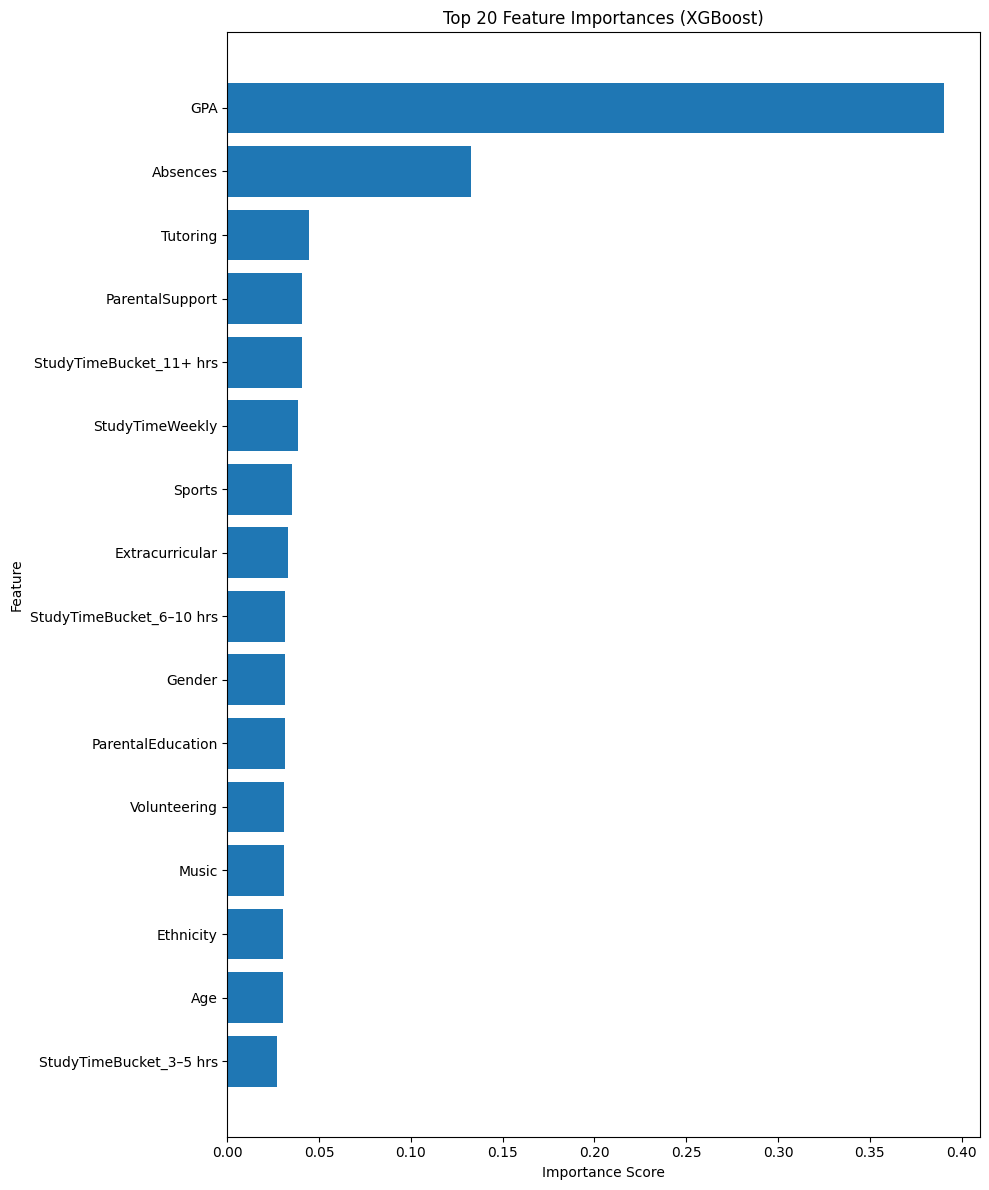

In [21]:
plt.figure(figsize=(10, 12))
plt.barh(feature_imp_df['Feature'][:20], feature_imp_df['Importance'][:20])
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Interpretation:

The feature importance analysis from the tuned XGBoost model shows that GPA-related factors, study habits, and attendance behaviors play the strongest roles in predicting GradeClass. StudyTimeWeekly and Absences have noticeably higher importance scores, suggesting that consistent academic engagement and attendance are strong indicators of student performance. Several categorical variables—such as ParentalSupport, Tutoring, and Extracurricular activities—also contribute to the model, but at lower levels, indicating they may influence performance indirectly or interact with other behaviors.

The relative importance of these features suggests that cultivating consistent study habits and reducing absenteeism may have a meaningful effect on student achievement. Understanding these relationships can support more targeted interventions for students who may be at risk academically.

These insights help educators identify which student behaviors are most strongly aligned with academic outcomes, allowing them to prioritize support strategies—such as tutoring, regular study routines, or attendance interventions—to improve learning outcomes.

# Unsupervised Learning Exploration

To complement our supervised modeling approach, we applied K-means clustering to the numeric features to explore whether natural student groupings exist in the dataset. The clusters reveal distinct patterns in GPA and study time, suggesting meaningful subgroups of learners.

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting specific numeric features for this
X_num = student_perf_df[["GPA", "StudyTimeWeekly", "Absences", "Age", "ParentalSupport"]]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# Choose k
kmeans = KMeans(n_clusters=5, random_state=42)
student_perf_df["Cluster"] = kmeans.fit_predict(X_scaled)


<Axes: xlabel='StudyTimeWeekly', ylabel='GPA'>

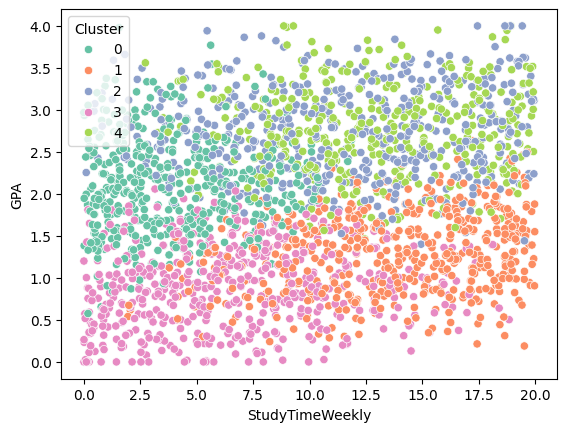

In [47]:
sns.scatterplot(
    data=student_perf_df,
    x="StudyTimeWeekly",
    y="GPA",
    hue="Cluster",
    palette="Set2"
)

In [48]:
pd.crosstab(student_perf_df["Cluster"], student_perf_df["GradeClass"])

GradeClass,0.0,1.0,2.0,3.0,4.0
Cluster,,,,,
0,16,32,80,137,196
1,8,12,8,44,437
2,45,123,158,124,43
3,1,7,10,12,495
4,37,95,135,97,40


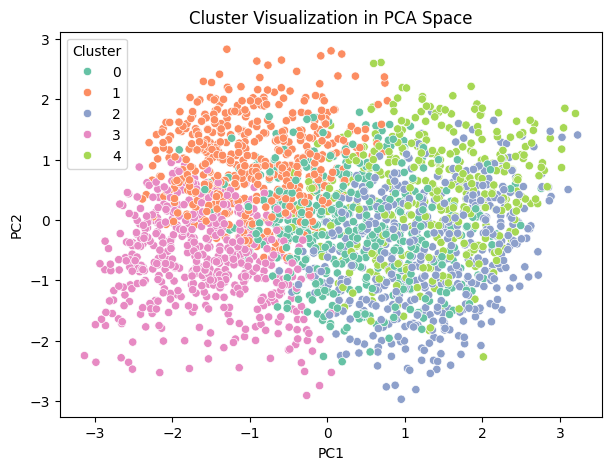

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)     # X_scaled = standardized numeric features

student_perf_df["PC1"] = components[:, 0]
student_perf_df["PC2"] = components[:, 1]

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=student_perf_df,
    x="PC1", y="PC2",
    hue="Cluster",
    palette="Set2"
)
plt.title("Cluster Visualization in PCA Space")
plt.show()

In [52]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X_num.columns
)

loadings

,PC1,PC2
GPA,0.707263,-0.009727
StudyTimeWeekly,0.131449,0.534652
Absences,-0.679182,0.251482
Age,0.012495,0.389164
ParentalSupport,0.145106,0.706654


How different features drive the different PCA clusters. Helps with interpretability.

To understand why K-means produced the five clusters, we examined the PCA loadings that determine how students are positioned in PCA space. PC1 is driven primarily by GPA (positive loading) and absences (negative loading), meaning it represents an “academic performance” axis where high-performing, low-absence students fall on the right and low-performing, high-absence students fall on the left. PC2 is shaped most strongly by parental support and weekly study time, with age contributing moderately; this axis reflects a “support and study engagement” dimension. When overlaid with cluster labels, the PCA scatterplot shows that clusters differ along these two core dimensions—some clusters are distinguished mainly by academic performance, while others differ in parental support, study effort, or student maturity. This analysis clarifies that the clusters represent meaningful combinations of performance behaviors and support factors rather than random groupings.

In [53]:
centroids = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=X_num.columns
)
centroids

,GPA,StudyTimeWeekly,Absences,Age,ParentalSupport
0,0.215835,-1.022831,-0.328704,0.331676,0.495455
1,-0.663386,0.726683,0.959253,-0.121597,0.535297
2,0.914612,0.332537,-0.907355,-0.953288,-0.119585
3,-1.110669,-0.553938,0.891375,-0.022856,-0.814954
4,0.920018,0.564483,-0.887606,0.968601,-0.031570


Cluster	Plain-English Description

0 -->	Solid performers with low study time but high parental support

1	--> Supported and hardworking but hampered by very high absences

2 -->	Young, low-support students who still excel academically

3 -->	At-risk group: low GPA, low support, high absences, low study time

4 -->	High-performing, older students with high study time and low absences